# 📉 Task 2.4: Data Quality Report

**Objective**: Assess the completeness and quality of the sensor data across all participants. Identify missing data patterns and potential issues.

## 1. Setup & Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob

# Set plot style
sns.set_theme(style="whitegrid", palette="viridis", context="talk")
plt.rcParams["figure.figsize"] = (14, 10)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14

# Data path
DATA_DIR = Path("../../data/raw/dataset")

## 2. Data Availability Overview
Checking which sensors have data for which users.

In [2]:
def get_user_list(data_dir):
    activity_files = glob.glob(str(data_dir / "sensing/activity/activity_*.csv"))
    users = [Path(f).stem.split('_')[1] for f in activity_files]
    return sorted(list(set(users)))

users = get_user_list(DATA_DIR)
print(f"Total Users Found: {len(users)}")

def check_data_coverage(users, data_dir):
    coverage_data = []
    
    for uid in users:
        user_stats = {'uid': uid}
        
        # Check Activity
        act_path = data_dir / f"sensing/activity/activity_{uid}.csv"
        if act_path.exists():
            try:
                df = pd.read_csv(act_path, index_col=False)
                df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce')
                user_stats['activity_days'] = df['timestamp'].dt.date.nunique()
                user_stats['activity_count'] = len(df)
            except:
                user_stats['activity_days'] = 0
        else:
            user_stats['activity_days'] = 0
            
        # Check Conversation
        conv_path = data_dir / f"sensing/conversation/conversation_{uid}.csv"
        if conv_path.exists():
            try:
                df = pd.read_csv(conv_path, index_col=False)
                df['start_timestamp'] = pd.to_datetime(df['start_timestamp'], unit='s', errors='coerce')
                user_stats['conv_days'] = df['start_timestamp'].dt.date.nunique()
            except:
                user_stats['conv_days'] = 0
        else:
            user_stats['conv_days'] = 0
            
        # Check GPS
        gps_path = data_dir / f"sensing/gps/gps_{uid}.csv"
        if gps_path.exists():
            try:
                df = pd.read_csv(gps_path, index_col=False)
                df['time'] = pd.to_datetime(df['time'], unit='s', errors='coerce')
                user_stats['gps_days'] = df['time'].dt.date.nunique()
            except:
                user_stats['gps_days'] = 0
        else:
            user_stats['gps_days'] = 0
            
        coverage_data.append(user_stats)
        
    return pd.DataFrame(coverage_data)

print("Checking data coverage (this may take a minute)...")
coverage_df = check_data_coverage(users, DATA_DIR)
coverage_df.head()

Total Users Found: 49
Checking data coverage (this may take a minute)...


,uid,activity_days,activity_count,conv_days,gps_days
0,u00,66,461991,66,66
1,u01,62,474862,55,62
2,u02,67,527518,65,67
3,u03,53,411402,43,53
4,u04,58,462516,58,56


## 3. Visualizing Data Coverage
Heatmap of days with data for each user.

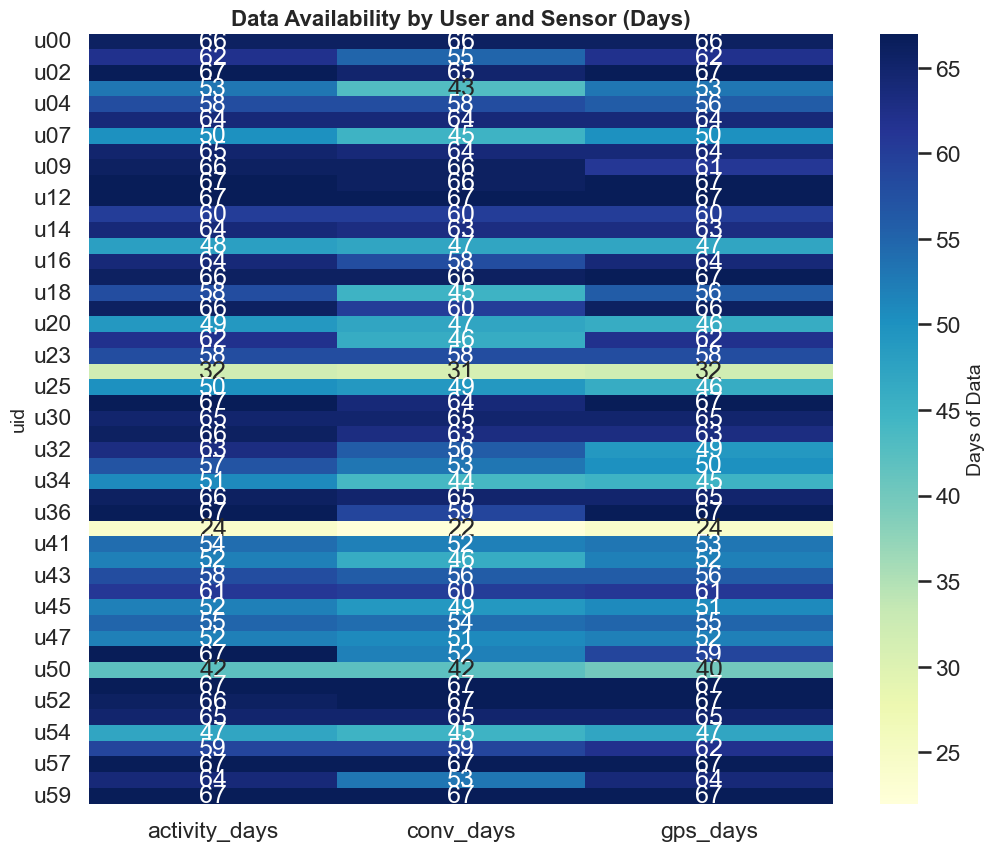

In [3]:
plt.figure(figsize=(12, 10))
sns.heatmap(coverage_df.set_index('uid')[['activity_days', 'conv_days', 'gps_days']], 
            annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Days of Data'})
plt.title("Data Availability by User and Sensor (Days)", fontweight='bold')
plt.show()

## 4. Usable Users Summary
Identifying users with sufficient data for analysis (e.g., > 30 days of activity data).

In [4]:
threshold_days = 30
usable_users = coverage_df[coverage_df['activity_days'] >= threshold_days]

print(f"Total Users: {len(coverage_df)}")
print(f"Users with >= {threshold_days} days of Activity Data: {len(usable_users)}")
print(f"Percentage Usable: {len(usable_users) / len(coverage_df) * 100:.1f}%")

print("\nUsable Users List:")
print(usable_users['uid'].tolist())

Total Users: 49
Users with >= 30 days of Activity Data: 48
Percentage Usable: 98.0%

Usable Users List:
['u00', 'u01', 'u02', 'u03', 'u04', 'u05', 'u07', 'u08', 'u09', 'u10', 'u12', 'u13', 'u14', 'u15', 'u16', 'u17', 'u18', 'u19', 'u20', 'u22', 'u23', 'u24', 'u25', 'u27', 'u30', 'u31', 'u32', 'u33', 'u34', 'u35', 'u36', 'u41', 'u42', 'u43', 'u44', 'u45', 'u46', 'u47', 'u49', 'u50', 'u51', 'u52', 'u53', 'u54', 'u56', 'u57', 'u58', 'u59']
